In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns

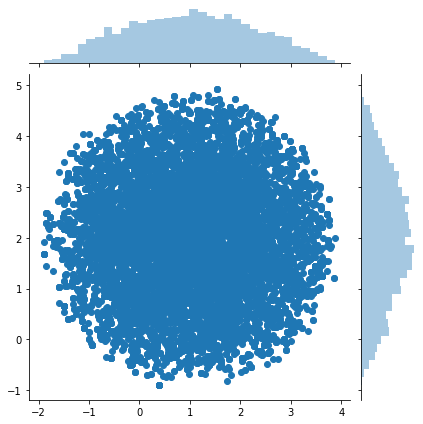

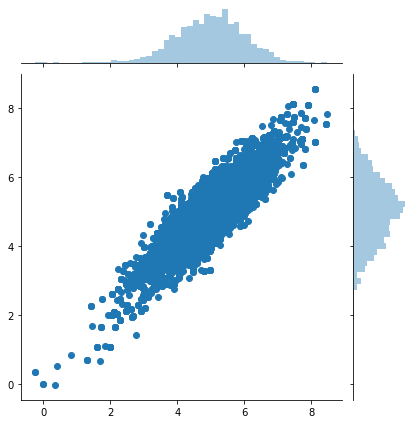

In [2]:
mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])


def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2


def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)


def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples


if __name__ == '__main__':
    samples = metropolis_hastings(circle, iter=10000)
    sns.jointplot(samples[:, 0], samples[:, 1])